In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
## source = 'https://raw.githubusercontent.com/olivierla412/Files/main/Advertising.csv' or 

source = 'adv.csv'


In [3]:
data = pd.read_csv(source)

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data1 = data[['TV','radio','newspaper','sales']]

In [6]:
data1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data1.shape

## checking the shape of the dataset (rows, coumns)

(200, 4)

In [8]:
## type of the data in dataset ( whether float_type, int_type,boolean_type)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# Chicking whether there is missing values.

data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

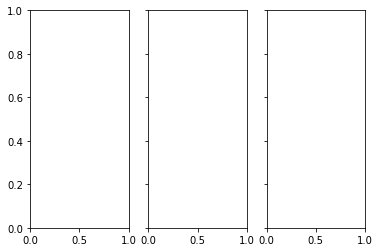

In [10]:
## Visualize the relationship between the feature and the response (label) using scatterplots


fig, axs = plt.subplots(1, 3,sharey= True)

# 1 = numbers of label and = sales
# 3 = number of features and = TV,radio,newspapers
## (1 row, 3 columns )

# share-y = y-tv , y-radio, y-newspaper 
# sharey = means the 3 feature will share the same y-axis at time



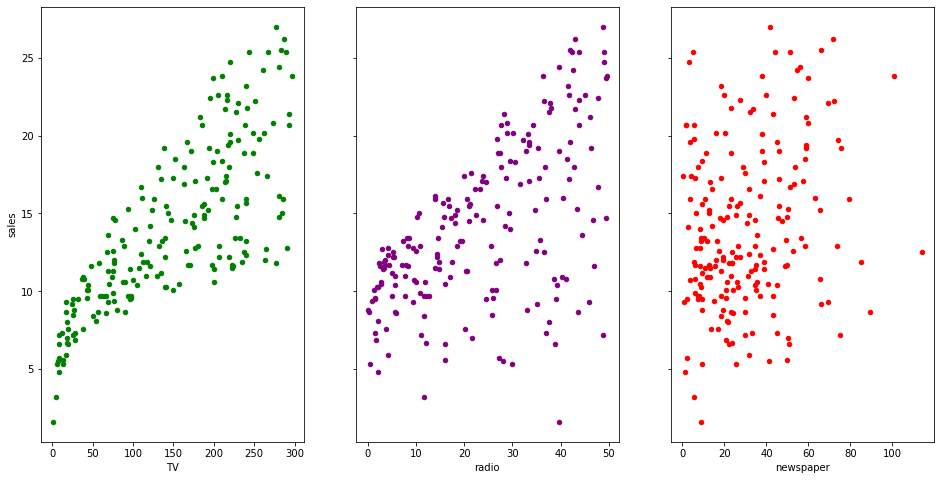

In [11]:
fig, axs = plt.subplots(1, 3,sharey= True)

data1.plot(kind = 'scatter',x='TV', y ='sales', ax= axs[0], figsize = (16,8),color ='green')
data1.plot(kind = 'scatter',x='radio', y ='sales', ax= axs[1],color ='purple')
data1.plot(kind = 'scatter',x='newspaper', y ='sales', ax= axs[2],color ='r')
fig.savefig('testdata1.jpg')

## fig.savefig('testdata1.jpg') It is used to save the plotted graph

#axs[0] = first_column = TV
#axs[1] = second_column = radio
#axs[2] = third_column = newspaper

### These all above is called __EDA__
##### __Exploratory__ __Data__ __Analysis__ .
##### L'analyse exploratoire des données.

## Questions about the data ?

###### 1. What'is the relationship between ads and sales ?
###### 2. How prominent is that relationship ?
###### 3. Which ad types contributes to sales ?
###### 4. How each ad contributes to sales ?
###### 5. Can sales be predicted based on the expense of the advertisement?
######      -----We will explore these questions below -----!

In [12]:
# Create x = feature and y = label

x = data1[['TV']]

y = data1.sales

# follow the usual sklearn pattern: import , instantiate, fit

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x, y)




LinearRegression()

In [13]:
# Print the intercept and coefficients

print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


#### Prediction using the model

##### If the expense on TV ad is $50000, what will be the prediction for that market???

In [14]:
## Calculate the prediction

7.032594 + 0.047537*50

9.409444

##### Thus , we would predict Sales 9,409 widgets in the market.

##### Let's do the same thing using code ...

In [15]:
## let's create a DataFrame since expects it

x_new = pd.DataFrame({'TV':[50,90]})
x_new.head()

,TV
0,50
1,90


In [16]:
## Let's used the model to make predictions on a new value.
lm.predict(x_new)

array([ 9.40942557, 11.31089119])

## example 2

In [17]:
## example 2
x_new2 = pd.DataFrame({'TV1':[data1.TV.min(),data1.TV.max()]})
x_new2.head()

,TV1
0,0.7
1,296.4


In [18]:
## make the predictions for those x values and store them

preds = lm.predict(x_new2)
preds

array([ 7.0658692 , 21.12245377])

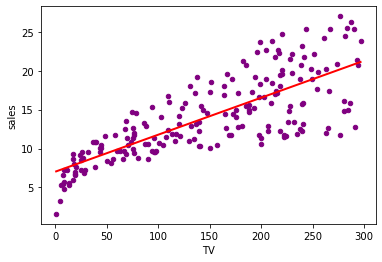

In [19]:
# first plot the observed data
data1.plot(kind = 'scatter', x = 'TV',y ='sales',color ='purple')

# then , plot the least square line ( best fit line )
plt.plot(x_new2, preds, c = 'red',linewidth = 2)
fig.savefig('testdata2.jpg')

# R^2 statistic 

### what is R square ?
#### It'is when there is one feature----

In [20]:
## print the R-squared values for model

## lm.rsquared

## Adjusted R^2 statistic 
#### It's used  when there are more than one feature ----

# __Multiple Linear Regression__

### y = c +M0X0 + M1X1 +..... + MnXn 

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [22]:
# create x and y 
x = data1[['TV','radio','newspaper']]
y = data1.sales
lm.fit(x, y)

# print intercept and coefficient

print('Intercept    -->',lm.intercept_.round(4))
print('TV:          -->',lm.coef_[0].round(4))
print('radio:       -->',lm.coef_[1].round(4))
print('newspaper:   -->',lm.coef_[2].round(4))

Intercept    --> 2.9389
TV:          --> 0.0458
radio:       --> 0.1885
newspaper:   --> -0.001


In [23]:
## checking

##lm = smf.ols(formula = 'sales ~TV + radio + newspaper', data = data1).fit()
##lm.config_int() # confident interval
##lm.summary()

In [24]:
### let's start with importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import pickle

In [25]:
## Read csv file and convert it into DataFrame

infoo = 'https://raw.githubusercontent.com/olivierla412/Files/main/Admission_Prediction.csv'
df = pd.read_csv(infoo)


In [26]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [27]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

##### Understand data at high level. Check the statistics of the data set


In [28]:
# Understand data at high level. Check the statistics of the data set

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# fill the NaN values  in the Dataset...


In [29]:
# fill the NaN values 

df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())


###  Verify if the NaN values is filled 

In [30]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Dropping unwanted columns

In [31]:
df = df.drop(columns= ['Serial No.'])


In [32]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


### Let's see how data is distributed  for every column


In [33]:
import warnings
warnings.filterwarnings('ignore')


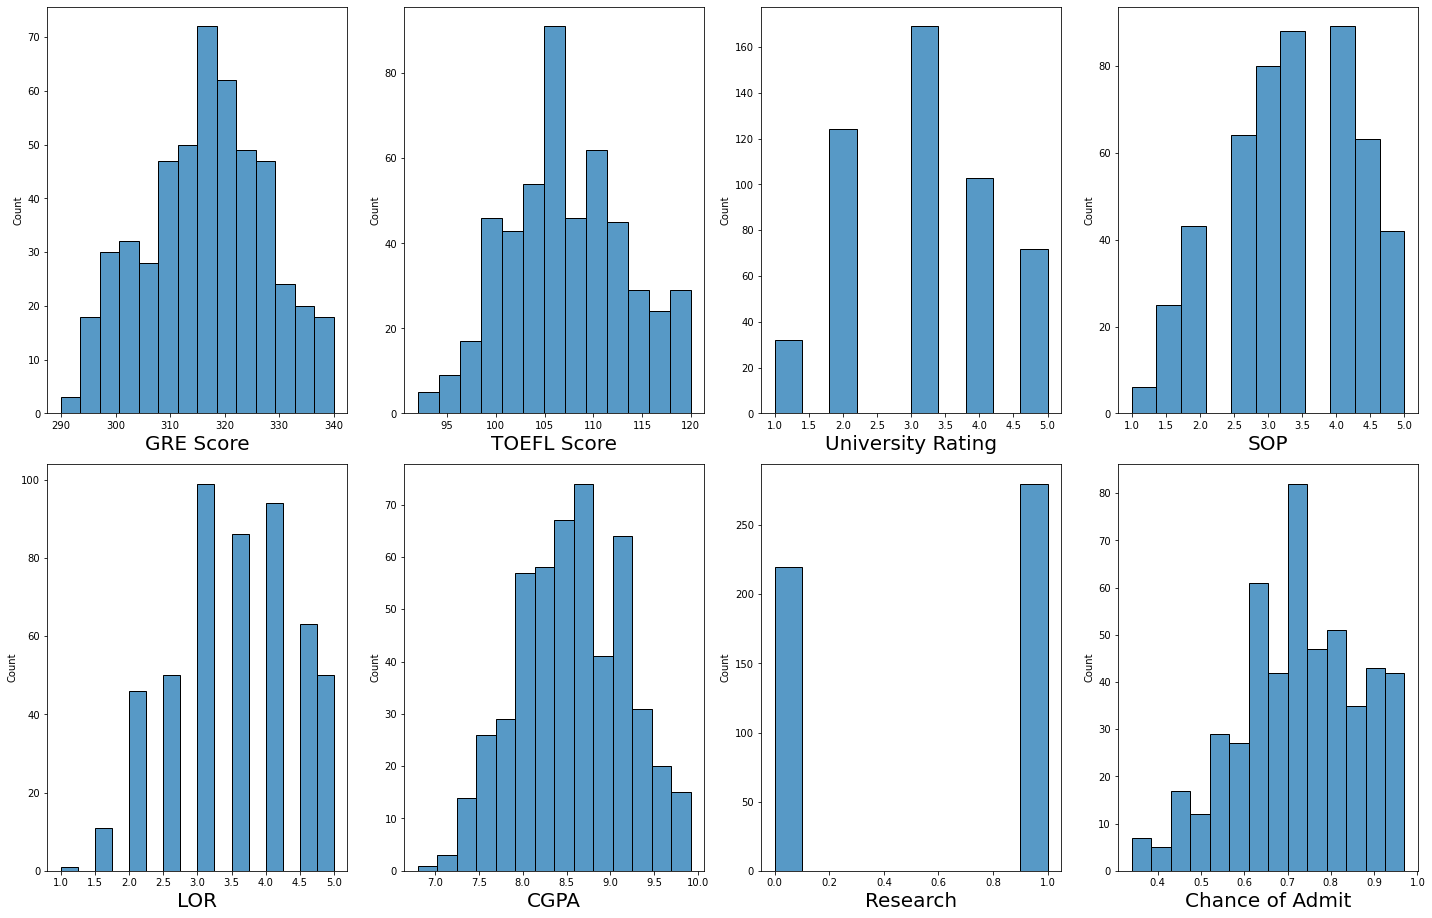

In [34]:
#Let's see how data is distributed  for every column...



plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df :
    if plotnumber <=16 :
        ax = plt.subplot(4,4, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()    
        


In [35]:
plotnumber = 1
for column in df :
    if plotnumber <=8 :
        print(plotnumber, column)
    plotnumber+=1 

1 GRE Score
2 TOEFL Score
3 University Rating
4 SOP
5 LOR
6 CGPA
7 Research
8 Chance of Admit


In [36]:
# Divide the Dataset into features and label

y = df['Chance of Admit']

x = df.drop(columns= ['Chance of Admit'])

In [37]:
y.head(2)


0    0.92
1    0.76
Name: Chance of Admit, dtype: float64

In [38]:
x.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1


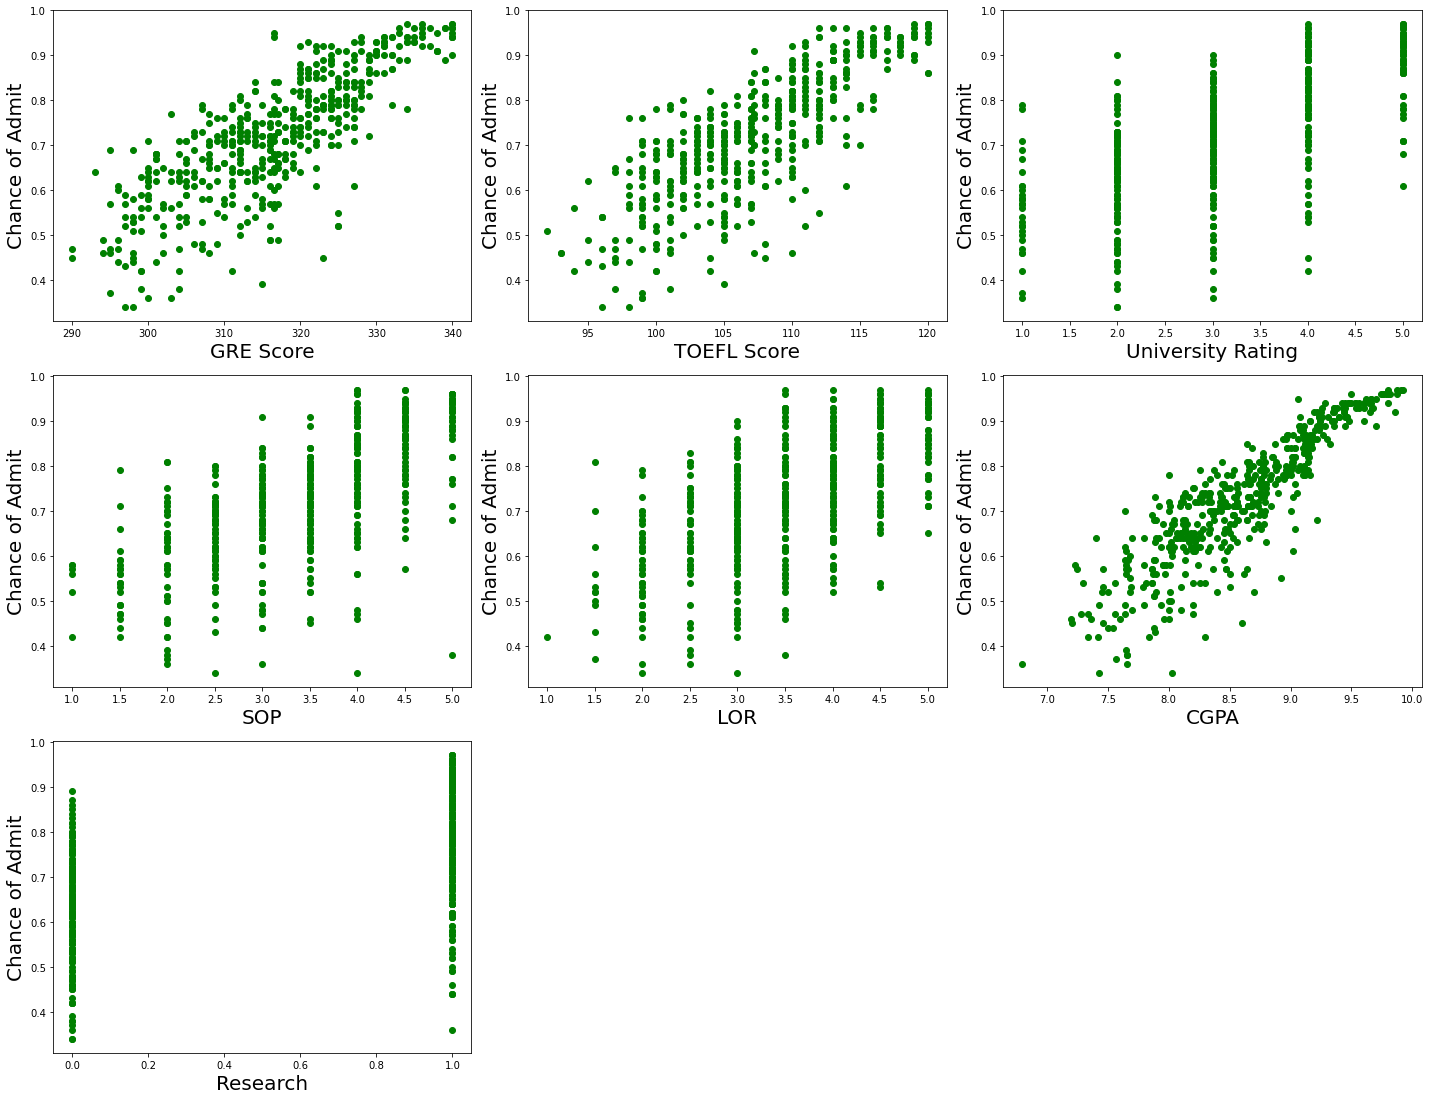

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x :
    if plotnumber <=15 :
        ax = plt.subplot(5,3, plotnumber)
        plt.scatter(x[column],y, color ='green')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Chance of Admit', fontsize = 20 )
        
    plotnumber+=1
plt.tight_layout() 

## We are going to build the __model__

#### Let's convert all the column to the same scale

In [40]:
# Data Scaling. Formula Z = (X - mean)/std

scaler = StandardScaler()

X_scaler =  scaler.fit_transform(x)

In [41]:
# How X_scaler data looks like ?

X_scaler

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [42]:

#Split data into tain and test.
#Model will be build on training data and tested on test data.

x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.25, random_state=20)


In [43]:
y_train.head()

418    0.60
107    0.91
92     0.34
354    0.59
431    0.73
Name: Chance of Admit, dtype: float64

## Model instantiating and training

In [44]:
regression = LinearRegression()

regression.fit(x_train, y_train) 

### fit(Questions, Answers)

# This is our model for prediction



LinearRegression()

### regression  is our model name 

## Predict the chance of admission for the  given  features ????

In [45]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76


In [46]:
print('\nChance of Admisson is:','\n','-'*20,'\n', regression.predict(scaler.transform([[337,118,4,4.5,4.5,9.65,1]])))


Chance of Admisson is: 
 -------------------- 
 [0.94889401]


In [47]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [48]:
print('\nChance of Admisson is:','\n','-'*20,'\n', regression.predict(scaler.transform([[327,113,4,4.5,4.5,9,0]])))


Chance of Admisson is: 
 -------------------- 
 [0.82246028]


### saving the model to the local file system

In [49]:
### How to save the model and send to someone esle

filename = 'finalize_model.pickle'
pickle.dump(regression, open(filename,'wb'))

### Prediction using the saved file 

In [50]:
### Prediction using the saved file 
loaded_model = pickle.load(open(filename,'rb'))

In [51]:
chance_is  = loaded_model.predict(scaler.transform([[327, 113,4, 4.5,4.5,9.04,0]])).round(2)

In [52]:
chance_is *100

array([83.])

In [53]:
## Adjusted R2 score

In [54]:
## Adjusted R2 score

regression.score(x_train, y_train)

## accuracy 1 / précision 1/ Trust percentage (%Trust)

0.8284374922697593

### let's check how well our model fits the test data.

In [55]:
regression.score(x_test, y_test)

## accuracy 2 /précision

0.7951907354248762

### let's plot and visualize it.


In [56]:
y_pred =regression.predict(x_test)

In [57]:
y_pred

array([0.88723278, 0.65560176, 0.94608492, 0.8328879 , 0.51592876,
       0.64247939, 0.63792683, 0.88913422, 0.48693949, 0.85883351,
       0.58160216, 0.80764775, 0.56577309, 0.54533381, 0.51980537,
       0.78237726, 0.719698  , 0.86176189, 0.55234276, 0.65576662,
       0.71482088, 0.47530713, 0.72305919, 0.80547008, 0.90513542,
       0.64131756, 0.54903213, 0.65117654, 0.93596745, 0.70028769,
       0.68980948, 0.59750276, 0.81643564, 0.58420715, 0.85519653,
       0.64125726, 0.80317903, 0.5365615 , 0.65279668, 0.66851354,
       0.96180228, 0.82678529, 0.70808486, 0.76400978, 0.7655561 ,
       0.71709857, 0.74560713, 0.93266141, 0.89758684, 0.47405736,
       0.65950441, 0.6339577 , 0.72959349, 0.68432646, 0.60917994,
       0.65285237, 0.82715146, 0.72797175, 0.78420525, 0.783788  ,
       0.86543553, 0.75447437, 0.94189308, 0.92636264, 0.69507832,
       0.55159534, 0.86350856, 0.66866363, 0.64247972, 0.72696492,
       0.77721783, 0.84142812, 0.52014683, 0.72968463, 0.73069

Text(0.5, 1.0, 'Actual VS Predicted')

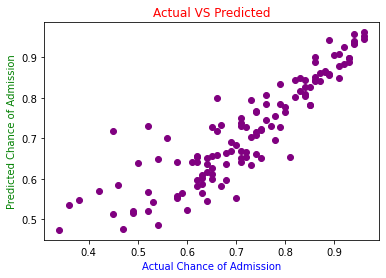

In [58]:
plt.scatter(y_test, y_pred,color ='purple')
plt.xlabel('Actual Chance of Admission',color='blue')
plt.ylabel('Predicted Chance of Admission',color='green')
plt.title('Actual VS Predicted',color='r')

## Model Evaluation.

#### . __Mean Absolute Error__ (MAE): Represent the average error
#### . __Mean Square Error__ (MSE): similar to MAE but noise is exaggerated and larger
####  errors are 'punished'. It is harder to interpret than MAE as it's not in
####  base units, however it is generally more popular.



#### . __Root Mean Squared Error__ (RMSE): Most popular metric, similar to MSE
####  however the result is square rooted to make it more interpretable as it's 
#### in bas units. It's recommended that RMSR be used as the primary metric to 
#### interpret the model.


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
y_pred = regression.predict(x_test)

In [61]:
mean_absolute_error(y_test,y_pred)

0.04647076776772614

In [62]:
mean_squared_error(y_test,y_pred)

0.004296637525706735

In [63]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06554874160277019

### You have successfully completed building Linear Regression Model.

## let's check if our model is overfitting or not

## Let's use Lasso(__L1 form__) and Ridge(__L2 form__) and find the __learning rate__

In [65]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

In [66]:
# LassoCV will return best alpha after max iteration
# Normalize  is subtracting the mean and dividibg by the L2-norm

lasscv = LassoCV(alphas=None, max_iter=1000, normalize=True)
lasscv.fit(x_train, y_train)

# CV mean cross validation

## above code is used to get alpha values , the learning rate

LassoCV(normalize=True)

In [67]:
alpha =lasscv.alpha_
alpha

1.4765247723028065e-05

In [68]:
## now that we have the best parameter, let's use Lasso regression
## and see how well our data fitted  before 

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=1.4765247723028065e-05)

In [69]:
lasso_reg.score(x_test, y_test)

0.795188250909729

## Using Ridge regression model

#### RidgeCV will return best alpha and coefficients after perfoming
#### 10 across validations.


In [73]:
# RidgeCV will return best alpha and coefficients after perfoming
#### 10 across validations.

ridgecv = RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize=True)

ridgecv.fit(x_train, y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [77]:
alpha1 = ridgecv.alpha_
alpha1

0.011

### The result is alpha = 0.011, It is called learning rate.

In [78]:
ridge_model = Ridge(alpha1)

## ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_test,y_test)

Ridge(alpha=0.011)

In [79]:
ridge_model.score(x_test,y_test)

0.8102963165162239

## __Concluson__: from all the above verifications we can say that our model is not __Overfitting__